In [33]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Para la Visualizacion 
# -----------------------------------------------------------------------
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Para los modelos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Importar métricas de evaluación directamente
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Para la codificación de las variables categóricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import TargetEncoder  

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

import pickle
import os
import sys 

import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as b

pd.set_option("display.max_columns", None)

In [34]:
df_sin_outpequeñas= pd.read_pickle("../../../datos/EF/Datos_modelos/pequeñas_sin_outliers.pkl")

# **VIVIENDAS PEQUEÑAS**

In [35]:
df_sin_outpequeñas.head()

,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,erfotov
0,Álava,Municipio_pequeño,De 50.000 habitantes o menos,70.450557,Junio,2021,Si,Si,4,Propia por herencia o donación,Desconocido,individual,Petróleo o derivados,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,Si,Si,Si,1,1,3,2,0,Entre 31 y 45 m2,1,Si,No,Si,Si,No,No,Si,servicio doméstico interno,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,No,Si,No,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Unifamiliar,Vivienda unifamiliar,2,1,De 1941 a 1950,bueno,No es accesible,No,Si,1,No,Si,Si,Alcantarillado,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,0
1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,51.333499,Mayo,2021,Si,Si,5,Alquilada,De 400€ a menos de 500€,individual,Gas butano o propano,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,No,1,0,3,0,1,Entre 31 y 45 m2,0,Si,Si,Si,No,No,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,Si,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Multifamiliar,Edificio con 10 o más viviendas,3,3,De 1971 a 1980,bueno,Es accesible,Si,No,No tiene garaje,Si,Si,Si,Alcantarillado,3,No tiene vehiculo,no tiene renovable,banda estrecha,País Vasco,6200,IBI,2147,4.2,0
2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,88.378354,Junio,2021,Si,No,1,Alquilada,De 100€ a menos de 200€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,No,Si,No,1,1,1,0,0,Hasta 30 m2,0,Si,Si,Si,No,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,Si,No,No,No,No,No,No,No,Si,Si,No,No,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 500€ a menos de 1.000€,Multifamiliar,Edificio de 3 a 9 viviendas,3,0,De 1961 a 1970,moderadamente mejorable,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,2,No tiene vehiculo,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,0
3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,99.561827,Mayo,2021,Si,Si,2,Alquilada,De 100€ a menos de 200€,individual,Electricidad,abastecimiento público,Si,Si,Si,No,No,No,Si,No,Si,Si,Si,Si,1,1,1,0,0,Entre 31 y 45 m2,0,Si,Si,Si,Si,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,Si,No,Si,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,Menos de 500€,Multifamiliar,Edificio de 3 a 9 viviendas,2,0,De 1961 a 1970,perfecto,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,1,No tiene vehiculo,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,0
4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,60.037846,Julio,2021,Si,No,1,Propia por compra totalmente pagada,Desconocido,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,No,No,Si,Si,No,No,No,No,No,1,1,2,0,0,Entre 31 y 45 m2,1,Si,Si,No,No,No,Si,No,No dispone de servicio doméstico,No dis

### Filtramos las columnas máximas con las que vamos a poder crear un modelo que nos valga teniendo en cuenta los datos de los que disponemos (los de Red Piso)

In [36]:
df_sin_outpequeñas.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

Aquí debido a lo que había visto en las correlaciones elimino horas de sol, garaje y tipoedif

In [37]:
df_sin_outpequeñas_fil=df_sin_outpequeñas[['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi','annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'nplazasgar', 'aguacalcent', 'ccaa', 'ayudas_ccaa',
       'bonificaciones', 'radiacion_solar', 'erfotov']]

In [79]:
df_sin_outpequeñas_fil.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,Álava,individual,1,3,Entre 31 y 45 m2,De 1941 a 1950,bueno,No es accesible,No,1,Si,País Vasco,4800,IBI,4.2,0
1,Álava,individual,1,3,Entre 31 y 45 m2,De 1971 a 1980,bueno,Es accesible,Si,No tiene garaje,Si,País Vasco,6200,IBI,4.2,0
2,Álava,No tiene calefacción,1,1,Hasta 30 m2,De 1961 a 1970,moderadamente mejorable,No es accesible,No,No tiene garaje,No,País Vasco,6200,IBI,4.2,0
3,Álava,individual,1,1,Entre 31 y 45 m2,De 1961 a 1970,perfecto,No es accesible,No,No tiene garaje,No,País Vasco,6200,IBI,4.2,0
4,Álava,No tiene calefacción,1,2,Entre 31 y 45 m2,Anterior a 1900,levemente mejorable,No es accesible,No,No tiene garaje,No,País Vasco,4800,IBI,4.2,0


In [39]:
columnas_categoricas=df_sin_outpequeñas_fil.select_dtypes(include=['object', 'category']).columns

In [40]:
columnas_categoricas

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'annoedifinterv',
       'estadoedif', 'accesoedif', 'ascensor', 'nplazasgar', 'aguacalcent',
       'ccaa', 'bonificaciones'],
      dtype='object')

**AHORA HACIENDO EL ENCODING Y TRATANDO EL DESBALANCEO**

In [41]:
b.detectar_orden_cat(df_sin_outpequeñas_fil, columnas_categoricas,"erfotov")

Estamos evaluando el orden de la variable IDQ_PV


erfotov,0,1
idq_pv,,
A Coruña,80,0
Albacete,21,1
Alicante,146,1
Almería,40,0
Asturias,156,3
Badajoz,36,2
Baleares,162,6
Barcelona,431,11
Burgos,27,1


La variable idq_pv NO tiene orden porque su p-valor es : 0.29416154026694097
Estamos evaluando el orden de la variable CALEFAC


erfotov,0,1
calefac,,
No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos),1145,13
No tiene calefacción,1749,38
colectiva,274,11
individual,1349,20


La variable calefac SI tiene orden porque su p-valor es : 0.0076736053628849955
Estamos evaluando el orden de la variable NASEOS


erfotov,0,1
naseos,,
0,37,8
1,4102,64
2,346,10
3,32,0


La variable naseos SI tiene orden porque su p-valor es : 4.462804796076205e-15
Estamos evaluando el orden de la variable NDORMITO


erfotov,0,1
ndormito,,
0,197,4
1,2063,39
2,1485,24
3,665,11
4,93,4
5,14,0


La variable ndormito NO tiene orden porque su p-valor es : 0.5764698187751032
Estamos evaluando el orden de la variable METROSVI


erfotov,0,1
metrosvi,,
Entre 31 y 45 m2,3620,58
Hasta 30 m2,897,24


La variable metrosvi SI tiene orden porque su p-valor es : 0.048729866087545884
Estamos evaluando el orden de la variable ANNOEDIFINTERV


erfotov,0,1
annoedifinterv,,
Anterior a 1900,231,6
De 1900 a 1920,153,2
De 1921 a 1940,190,0
De 1941 a 1950,198,1
De 1951 a 1960,401,4
De 1961 a 1970,643,5
De 1971 a 1980,629,14
De 1981 a 1990,514,10
De 1991 a 2000,618,11


La variable annoedifinterv SI tiene orden porque su p-valor es : 0.007415708681274058
Estamos evaluando el orden de la variable ESTADOEDIF


erfotov,0,1
estadoedif,,
bueno,921,9
casi inhabitable,47,2
casi perfecto,429,13
inhabitable,54,2
levemente mejorable,591,11
mejorable,122,4
moderadamente bueno,578,10
moderadamente mejorable,202,4
muy bueno,1037,18


La variable estadoedif NO tiene orden porque su p-valor es : 0.3596849198243933
Estamos evaluando el orden de la variable ACCESOEDIF


erfotov,0,1
accesoedif,,
Es accesible,2516,49
No es accesible,2001,33


La variable accesoedif NO tiene orden porque su p-valor es : 0.534856138657124
Estamos evaluando el orden de la variable ASCENSOR


erfotov,0,1
ascensor,,
No,2700,39
Si,1817,43


La variable ascensor SI tiene orden porque su p-valor es : 0.034027399346687665
Estamos evaluando el orden de la variable NPLAZASGAR


erfotov,0,1
nplazasgar,,
1,210,5
2,93,2
De 101 a 150,71,2
De 11 a 20,245,3
De 21 a 50,332,6
De 3 a 5,82,2
De 51 a 100,175,6
De 6 a 10,141,4
Más de 150,85,3


La variable nplazasgar NO tiene orden porque su p-valor es : 0.6545274188021052
Estamos evaluando el orden de la variable AGUACALCENT


erfotov,0,1
aguacalcent,,
No,3410,44
Si,1107,38


La variable aguacalcent SI tiene orden porque su p-valor es : 1.0697543241082771e-05
Estamos evaluando el orden de la variable CCAA


erfotov,0,1
ccaa,,
Andalucía,682,4
Aragón,138,2
Asturias,156,3
Cantabria,108,0
Castilla y León,280,2
Castilla-La Mancha,146,2
Cataluña,558,14
Ceuta,92,0
Comunidad Valenciana,233,2


La variable ccaa SI tiene orden porque su p-valor es : 0.029644723855684025
Estamos evaluando el orden de la variable BONIFICACIONES


erfotov,0,1
bonificaciones,,
IBI,1637,35
IBI y ICIO,2676,46
Ninguna,204,1


La variable bonificaciones NO tiene orden porque su p-valor es : 0.22116395767221772


#### CONCLUSIONES SOBRE EL ORDEN:  

**NO ORDENADAS:**
- idq_pv  
- ndormito  
- estadoedif   
- accesoedif  
- garaje  
- nplazasgar
- bonificaciones  
  
 *- get- dummies (pandas)*  
 *- One-Hot Encoding (SKlearn) (es más efectivo)*  
 *Ambas te crean tantas columnas como categorias hay en la columna y hace que en esa solo valga 1 las que coincidan y 0 el resto*


**ORDENADAS:**  
- calefac 
- naseos  
- metrosvi  
- tipoedif  
- annoedifinterv  
- ascensor  
- aguacalcent  
- ccaa  
  

*- Ordinal Encoding  (Los codifica en función de los pesos que le digamos)*
*- Label Encoding (Los codifica en orden alfabetico)*  
*- Target Encoding (Los codifica en funcion de las medias (osea en función de la relación con la variable dependiente))*  
*- Frequency Encoding (Los codifica en funcion de la frecuencia(en función del value_counts))*  



OPTO POR UN FREQUENCY

In [42]:
diccionario_encoding = {"onehot": ["idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"], 
                        "dummies": [], # no metemos ninguna
                        'ordinal' : { }, #no metemos ninguna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": ["calefac", "naseos", "metrosvi", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"], 
                        "target": ["calefac", "naseos", "metrosvi", "annoedifinterv","ascensor", "aguacalcent", "ccaa"]  
                        }

In [44]:
encoding=b.Encoding(df_sin_outpequeñas_fil, diccionario_encoding, "erfotov")
encoded,frecuencia_dicc=encoding.frequency_encoding()

In [46]:
frecuencia_dicc

{'calefac': calefac
 No tiene calefacción                                                                             0.388563
 individual                                                                                       0.297673
 No pero sí aparato que permite calentar alguna habitación (por ejemplo radiadores eléctricos)    0.251794
 colectiva                                                                                        0.061970
 Name: proportion, dtype: float64,
 'naseos': naseos
 1    0.905849
 2    0.077408
 0    0.009785
 3    0.006958
 Name: proportion, dtype: float64,
 'metrosvi': metrosvi
 Entre 31 y 45 m2    0.799739
 Hasta 30 m2         0.200261
 Name: proportion, dtype: float64,
 'annoedifinterv': annoedifinterv
 De 2001 a 2010      0.174603
 De 1961 a 1970      0.140900
 De 1971 a 1980      0.139813
 De 1991 a 2000      0.136769
 De 1981 a 1990      0.113938
 De 1951 a 1960      0.088063
 Anterior a  1900    0.051533
 De 1941 a 1950      0.043270
 De 1921 a 19

In [47]:
with open('../../../transformers/preprocesamiento/pequeñas/frecuencia_dicc.pkl', 'wb') as t:
    pickle.dump(frecuencia_dicc, t)

In [48]:
encoded.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.043270,0.202218,0.44227,0.595564,0.046749,0.248967,0.036095,4800,0.363557,4.2,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.139813,0.202218,0.55773,0.404436,0.681018,0.248967,0.036095,6200,0.363557,4.2,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.140900,0.044792,0.44227,0.595564,0.681018,0.751033,0.036095,6200,0.363557,4.2,0
3,0.005219,0.297673,0.905849,0.457056,0.799739,0.140900,0.106762,0.44227,0.595564,0.681018,0.751033,0.036095,6200,0.363557,4.2,0
4,0.005219,0.388563,0.905849,0.328115,0.799739,0.051533,0.130898,0.44227,0.595564,0.681018,0.751033,0.036095,4800,0.363557,4.2,0


**AHORA HACIENDO LA ESTANDARIZACIÓN**

In [49]:
scaler=StandardScaler()
nums=encoded.select_dtypes(include=np.number)
nums.drop(columns="erfotov", inplace=True)
nums.drop(columns=columnas_categoricas, inplace=True)
cols_num=nums.columns
dfa=scaler.fit_transform(nums)
df=pd.DataFrame(dfa, columns=cols_num)
encoded[cols_num]= df

In [50]:
with open('../../../transformers/preprocesamiento/pequeñas/Standard_scaler.pkl', 'wb') as t:
    pickle.dump(scaler, t)

In [51]:
encoded.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.043270,0.202218,0.44227,0.595564,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.139813,0.202218,0.55773,0.404436,0.681018,0.248967,0.036095,0.261297,0.363557,-1.854864,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.140900,0.044792,0.44227,0.595564,0.681018,0.751033,0.036095,0.261297,0.363557,-1.854864,0
3,0.005219,0.297673,0.905849,0.457056,0.799739,0.140900,0.106762,0.44227,0.595564,0.681018,0.751033,0.036095,0.261297,0.363557,-1.854864,0
4,0.005219,0.388563,0.905849,0.328115,0.799739,0.051533,0.130898,0.44227,0.595564,0.681018,0.751033,0.036095,-0.631358,0.363557,-1.854864,0


AHORA EL DESBALANCEO

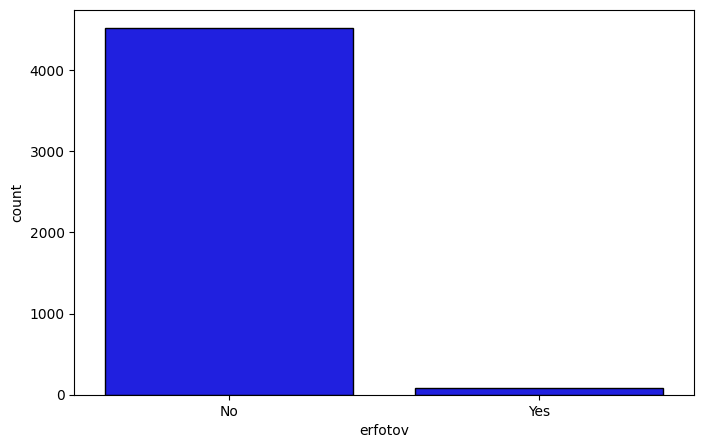

In [52]:
desbalanceo=b.Desbalanceo(encoded,"erfotov")
desbalanceo.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN TOMEKLINK**

-  Elimina pares de muestras cercanas entre la clase mayoritaria y la clase minoritaria donde el vecino más cercano de un punto de la clase minoritaria pertenece a la clase mayoritaria.

In [53]:
encoded.shape

(4599, 16)

In [54]:
balanced_tomek,tomek_pequeñas_1=desbalanceo.balancear_clases_tomek()

In [55]:
with open('../../../transformers/preprocesamiento/pequeñas/tomek_pequeñas_1.pkl', 'wb') as t:
    pickle.dump(tomek_pequeñas_1, t)

In [56]:
balanced_tomek.shape

(4564, 16)

In [57]:
balanced_tomek.head(2)

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.043270,0.202218,0.44227,0.595564,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.139813,0.202218,0.55773,0.404436,0.681018,0.248967,0.036095,0.261297,0.363557,-1.854864,0


In [58]:
round(balanced_tomek["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    98.2
1     1.8
Name: proportion, dtype: float64

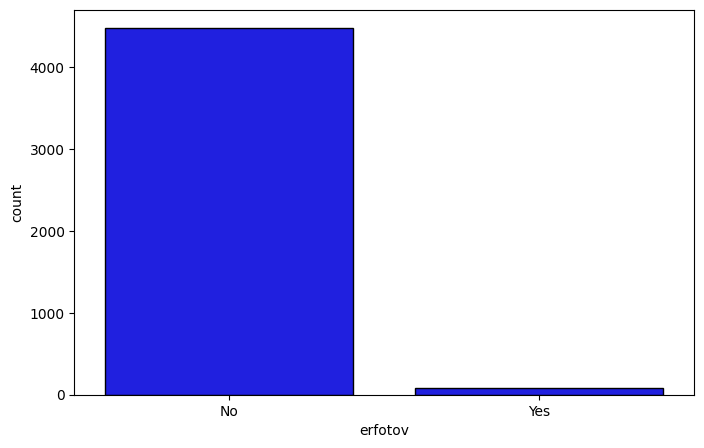

In [59]:
desbalanceo2=b.Desbalanceo(balanced_tomek,"erfotov")
desbalanceo2.visualizar_clase(color="blue", edgecolor="black")

#### **USO UN SMOTENC PARA QUE NO TOQUE LAS CATEGORICAS**

In [60]:
columnas_son_cat_encoded=["calefac", "naseos", "metrosvi", "annoedifinterv","ascensor", "aguacalcent", "ccaa","idq_pv", "ndormito", "estadoedif", "accesoedif", "nplazasgar", "bonificaciones"]

In [61]:
balanced_tomek.shape

(4564, 16)

In [62]:
encoded.columns

Index(['idq_pv', 'calefac', 'naseos', 'ndormito', 'metrosvi', 'annoedifinterv',
       'estadoedif', 'accesoedif', 'ascensor', 'nplazasgar', 'aguacalcent',
       'ccaa', 'ayudas_ccaa', 'bonificaciones', 'radiacion_solar', 'erfotov'],
      dtype='object')

In [63]:
df_balanceado_smote, smotenc_pequeñas=desbalanceo2.balancear_clase_smotenc(columnas_son_cat_encoded, sampling_strategy=0.6)

In [64]:
with open('../../../transformers/preprocesamiento/pequeñas/smotenc_pequeñas.pkl', 'wb') as t:
    pickle.dump(smotenc_pequeñas, t)

In [65]:
df_balanceado_smote.head(3)

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.005219,0.297673,0.905849,0.146988,0.799739,0.043270,0.202218,0.44227,0.595564,0.046749,0.248967,0.036095,-0.631358,0.363557,-1.854864,0
1,0.005219,0.297673,0.905849,0.146988,0.799739,0.139813,0.202218,0.55773,0.404436,0.681018,0.248967,0.036095,0.261297,0.363557,-1.854864,0
2,0.005219,0.388563,0.905849,0.457056,0.200261,0.140900,0.044792,0.44227,0.595564,0.681018,0.751033,0.036095,0.261297,0.363557,-1.854864,0


In [66]:
round(df_balanceado_smote["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.5
1    37.5
Name: proportion, dtype: float64

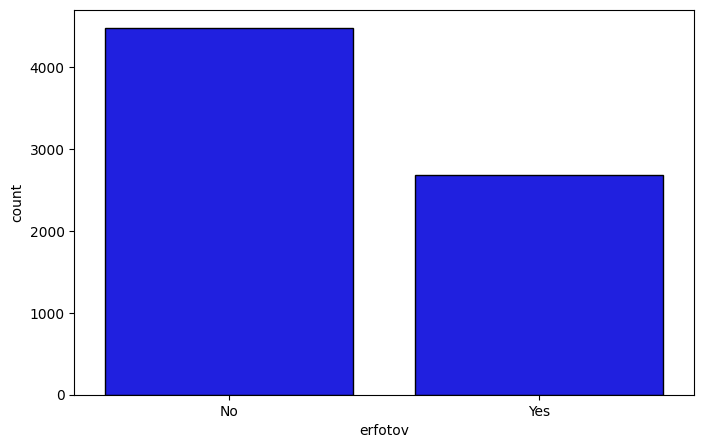

In [67]:
desbalanceo3=b.Desbalanceo(df_balanceado_smote,"erfotov")
desbalanceo3.visualizar_clase(color="blue", edgecolor="black")

In [68]:
df_balanceado_smote["erfotov"].unique()

array([0, 1])

In [69]:
df_balanceado_smote.shape

(7171, 16)

In [70]:
balanced_tomek2,tomek_pequeñas_2=desbalanceo3.balancear_clases_tomek()

In [71]:
with open('../../../transformers/preprocesamiento/pequeñas/tomek_pequeñas_2.pkl', 'wb') as t:
    pickle.dump(tomek_pequeñas_2, t)

In [72]:
balanced_tomek2.shape

(7140, 16)

In [73]:
round(balanced_tomek2["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    62.34
1    37.66
Name: proportion, dtype: float64

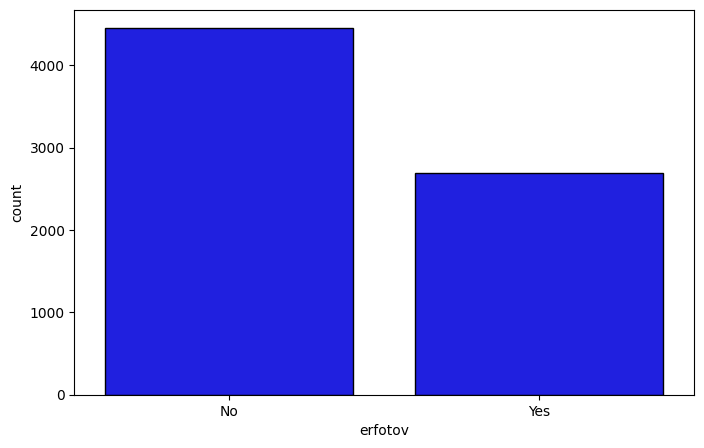

In [74]:
desbalanceo4=b.Desbalanceo(balanced_tomek2,"erfotov")
desbalanceo4.visualizar_clase(color="blue", edgecolor="black")

Uso el primer Tomek para reducir un poco la mayoritaria (No demasiado he de decir) y hacer los "márgenes más claros entre las clases. Luego uso el Smotenc que me hace un upsampling y finalmente uso un tomek de nuevo para volver a marcar bien las clases tras haber generado datos con el smotenc.

**OBSERVAMOS SI HAY ALTAS CORRELACIONES POR SI LAS TENEMOS QUE TRATAR**

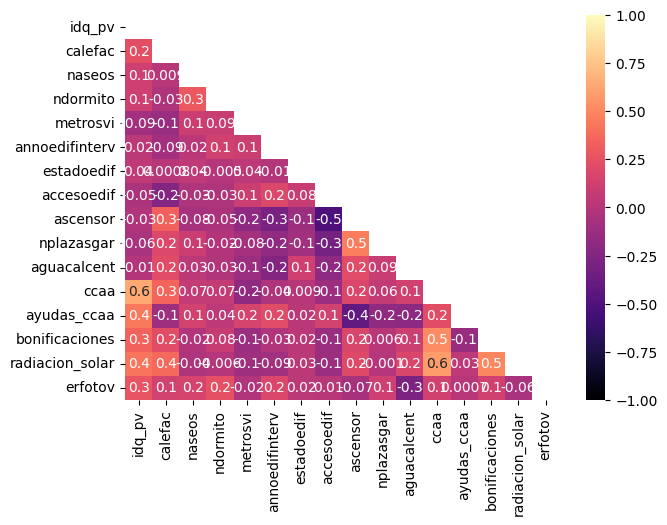

In [75]:
abcc=b.Visualizador(balanced_tomek2) #a
abcc.correlacion()

Tratamos las altas correlaciones:  
- Elimino garaje, horas de sol y tipoedif (pero lo hago al principio para que el pkl no se guarde con esas variables)

### **Me guardo ya el conjunto de datos preprocesado** (habiendo guardado cada preprocesamiento (transformer) en un pickle)

In [76]:
balanced_tomek2.to_pickle("../../../datos/EF/Datos_modelos/Modelo_pequeñas/pequeñas_preprocesadas.pkl")